# Find optimal K

Source: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [4]:
#Basic imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from sklearn import metrics #used for labeling

from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 

#plotly imports
import plotly as py
import chart_studio.plotly as cs
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
#read dummy df
X = pd.read_csv('scaled_dummy_reduced_df.csv', index_col=0)

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [5]:
# Distortion is the average of the squared distances from the clusters centers of each cluster
distortions = [] 
# Inertia is the sum of squared distances of samples to their closest cluster center.
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [6]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 4.178770158091719
2 : 3.9034937115143267
3 : 3.7852075300091843
4 : 3.6870249803801705
5 : 3.5933638848297584
6 : 3.5181770425550924
7 : 3.4621025649110573
8 : 3.4270344671541664
9 : 3.3936378449351605


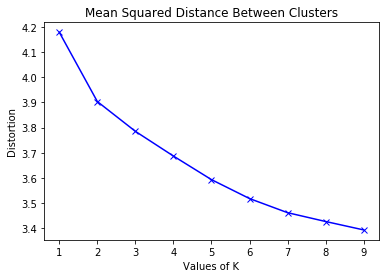

In [9]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Mean Squared Distance Between Clusters') 
plt.show() 